# Asymptotic in the DL model on exp1a
### Cedric Chauve
#### January 29, 2019

## Introduction

This notebook describes the results obtained when computing the growth factor of for the species trees sampled in the experiment exp1a. For each species tree size *k* and each of the *n* random species tree of size *k*, we computed using Maple and scipy the exponential growth factor $\lambda$ for the counting sequence of the DL-histories for this tree. The number of DL-histories is then of the form $C (\lambda^n)/(n^{3/2})$, for a constant $C$.

The systems of equations used to compute $\lambda$ for each species tree is in the file *systems/exp1a_k_add1_sys*. To solve the systems, a python script generated another python script *src/k_solver.py* that solves all system using the *Newton-Krylov* solver of *SciPy* and the results are stored in the file *systems/systems/exp1a_k_asy*.

Next, we compared the sequence defined using the asymptotics with the exact counting sequence. For each value of *k*, each species tree and each value of *n* (DL-history size), we computed the ratio between the exact counting value recorded in the file *../../09-01-2019-exp1-redone/results/exp1a_k.gz* and the asymptotic value given by $C (\lambda^n)/(n^{3/2})$. The results are in the files *systems/systems/exp1a_k_comparison*.

## Analysis

### Plotting the growth factor
We first look at the distribution of the growth factors for each value of $k$.

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
K_MIN = 3
K_MAX = 32
K_VALUES = [k for k in range(K_MIN,K_MAX+1)]

In [4]:
# Creating a data frame with the values of lambda
LAMBDA_K_aux = {}
for k in K_VALUES:
    LAMBDA_K_aux[k] = []
    data = open('../systems/exp1a_'+str(k)+'_asy').readlines()
    for l in data:
        if l[0] != '#':
            l1  = l.rstrip().split('\t')
            LAMBDA_K_aux[k].append(float(l1[2]))
LAMBDA_K = pd.DataFrame.from_dict(LAMBDA_K_aux)

<Figure size 432x288 with 0 Axes>

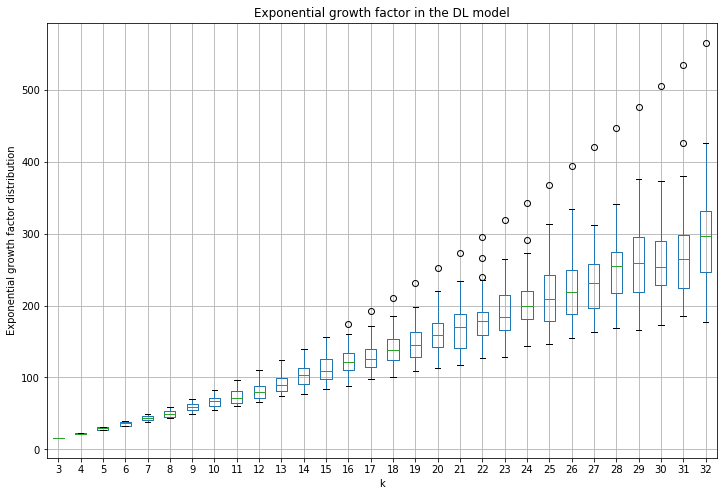

In [5]:
plt.figure()
ax1 = LAMBDA_K.plot(kind='box', grid=True, return_type='axes', figsize=(12,8), title='Exponential growth factor in the DL model')
ax1.set_ylabel('Exponential growth factor distribution')
ax1.set_xlabel('k')
plt.savefig('growth_factor_DL.png')
plt.show()

### Comments
With no surprise, we see a general increase of the average exponential growth factor, although with some exceptions, but also an increasing dispersion.

### Comparing the asymptotics with the exact counting sequence: constants
By looking at the ratio between the exact value for $n=50$ (highest value of $n$) and the asymptotic estimate, we generate the distribution of the value of the conatant $C$.

In [6]:
# Creating a data frame with the values of the constant
CONSTANTS_K_aux = {}
for k in K_VALUES:
    CONSTANTS_K_aux[k] = []
    data = open('../systems/exp1a_'+str(k)+'_comparison').readlines()
    for l in data:
        if l[0] != '#':
            l1  = l.rstrip().split('\t')
            ratios = l1[4].split()
            CONSTANTS_K_aux[k].append(float(ratios[len(ratios)-1]))
CONSTANTS_K = pd.DataFrame.from_dict(CONSTANTS_K_aux)

<Figure size 432x288 with 0 Axes>

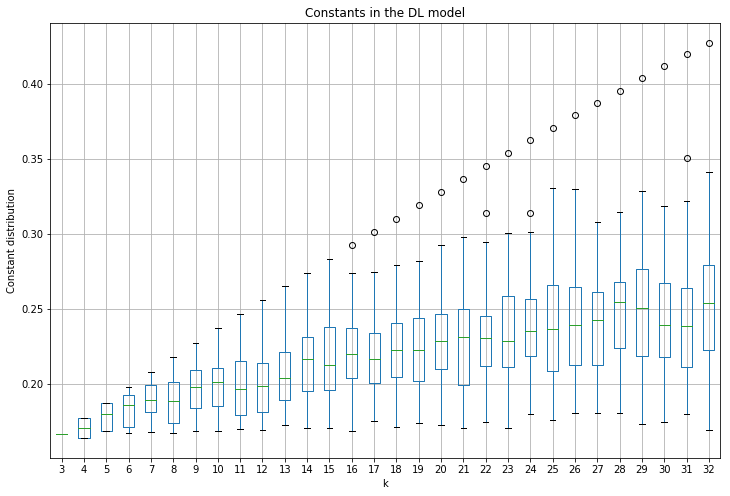

In [7]:
plt.figure()
ax2 = CONSTANTS_K.plot(kind='box', grid=True, return_type='axes', figsize=(12,8), title='Constants in the DL model')
ax2.set_ylabel('Constant distribution')
ax2.set_xlabel('k')
plt.savefig('constant_asymptotics_DL.png')
plt.show()

### Comments
The trend looks much less clear. The constants seem to be much more variable for a given value of *k*.

### Comparing the exponential growth rate and the number of subtrees
For each species tree, we count the number of subtrees it contains and the exponential growth rate and generate a scatter plot, not accounting for the size of the species tree.

In [10]:
# Recording the number of subtrees and the asymptotics in a single data frame
SUBTREES_LAMBDA_aux = {}

for k in K_VALUES:
    data_sys = open('../systems/exp1a_'+str(k)+'_add1_sys').readlines()
    data_asy = open('../systems/exp1a_'+str(k)+'_asy').readlines()
    for l in data_sys:
        if l[0] != '#':
            l1  = l.rstrip().split('\t')
            SUBTREES_LAMBDA_aux[(k,l1[1])] = {'subtrees': l1[3].count('('), 'growth': 0.0}
    for l in data_asy:
        if l[0] != '#':
            l1  = l.rstrip().split('\t')
            SUBTREES_LAMBDA_aux[(k,l1[1])]['growth'] = float(l1[2])
SUBTREES_LAMBDA = pd.DataFrame.from_dict(SUBTREES_LAMBDA_aux).transpose()

<Figure size 432x288 with 0 Axes>

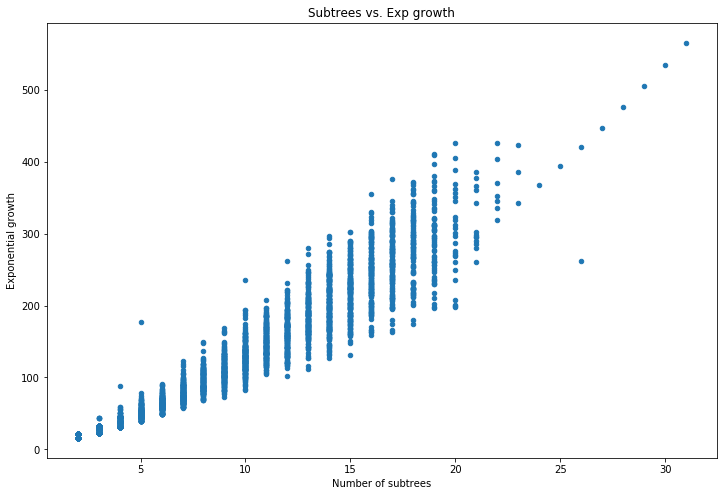

In [16]:
plt.figure()
ax3 = SUBTREES_LAMBDA.plot(kind='scatter', x='subtrees', y='growth', figsize=(12,8), title='Subtrees vs. Exp growth')
ax3.set_xlabel('Number of subtrees')
ax3.set_ylabel('Exponential growth')
plt.savefig('Nb_subtrees_vs_exp_growth.png')
plt.show()